<a href="https://colab.research.google.com/github/julvasilenko/Online-store-sales-analytics/blob/main/Online_store_sales_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connecting to the Big Query database

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import normaltest, spearmanr, f_oneway

In [5]:
!pip install --upgrade google-cloud-bigquery
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

auth.authenticate_user()

client = bigquery.Client(project="data-analytics-mate")

query = """
SELECT
    s.date AS order_date,
    s.ga_session_id AS session_id,
    sp.continent,
    sp.country,
    sp.device,
    sp.browser,
    sp.mobile_model_name,
    sp.operating_system,
    sp.language,
    sp.medium AS traffic_source,
    sp.channel AS traffic_channel,
    a.id AS account_id,
    a.is_verified,
    a.is_unsubscribed,
    p.category AS product_category,
    p.name AS product_name,
    p.price,
    p.short_description AS product_description
FROM `data-analytics-mate.DA.order` o
LEFT JOIN `data-analytics-mate.DA.session` s
    ON o.ga_session_id = s.ga_session_id
LEFT JOIN `data-analytics-mate.DA.session_params` sp
    ON s.ga_session_id = sp.ga_session_id
LEFT JOIN `data-analytics-mate.DA.account_session` acs
    ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `data-analytics-mate.DA.account` a
    ON acs.account_id = a.id
LEFT JOIN `data-analytics-mate.DA.product` p
    ON o.item_id = p.item_id
"""

query_job = client.query(query)
results = query_job.result()
sales = results.to_dataframe()
print(sales.head())

   order_date  session_id continent        country   device browser  \
0  2020-11-06  7799937037    Europe       Slovakia   mobile  Chrome   
1  2020-11-10  4020421879  Americas  United States  desktop  Chrome   
2  2020-11-24  6717382496  Americas  United States  desktop  Chrome   
3  2020-11-26  2093497337  Americas  United States  desktop  Chrome   
4  2020-12-03  9506718330    Europe          Spain  desktop  Chrome   

  mobile_model_name operating_system language traffic_source traffic_channel  \
0           <Other>              Web       fr       referral     Paid Search   
1            Safari        Macintosh       en         (none)          Direct   
2            Chrome              Web    en-us       referral   Social Search   
3            Chrome              Web    en-us         (none)          Direct   
4        ChromeBook          <Other>    en-us       referral     Paid Search   

   account_id  is_verified  is_unsubscribed      product_category  \
0        <NA>         <

#Description of the dataset

In [8]:
sales.head(10)

,order_date,session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_source,traffic_channel,account_id,is_verified,is_unsubscribed,product_category,product_name,price,product_description
0,2020-11-06,7799937037,Europe,Slovakia,mobile,Chrome,<Other>,Web,fr,referral,Paid Search,<NA>,<NA>,<NA>,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm"
1,2020-11-10,4020421879,Americas,United States,desktop,Chrome,Safari,Macintosh,en,(none),Direct,653378,1,0,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm"
2,2020-11-24,6717382496,Americas,United States,desktop,Chrome,Chrome,Web,en-us,referral,Social Search,<NA>,<NA>,<NA>,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm"
3,2020-11-26,2093497337,Americas,United States,desktop,Chrome,Chrome,Web,en-us,(none),Direct,<NA>,<NA>,<NA>,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm"
4,2020-12-03,9506718330,Europe,Spain,desktop,Chrome,ChromeBook,<Other>,en-us,referral,Paid Search,<NA>,<NA>,<NA>,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm"
5,2020-12-08,4491362682,Americas,United States,desktop,Safari,Safari,Web,zh,<Other>,Paid Search,<NA>,<NA>,<NA>,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm"
6,2020-12-09,9174204522,Americas,El Salvador,mobile,Safari,iPhone,Web,en-us,(none),Direct,654797,0,0,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm"
7,2020-12-17,7673590503,Oceania,Australia,desktop,Chrome,Safari,Macintosh,en-us,referral,Social Search,<NA>,<NA>,<NA>,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm"
8,2020-12-18,5930769439,Europe,Spain,desktop,Chrome,Chrome,Web,en-us,<Other>,Paid Search,<NA>,<NA>,<NA>,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm"
9,2020-12-19,6224067015,Americas,United States,desktop,Edge,Edge,Windows,None,organic,Organic Search,<NA>,<NA>,<NA>,Children's furniture,TROFAST,5.0,"Lid, 20x28 cm"


The dataset contains information **about online store sales, customers and their registration, products and their brief descriptions**.

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date           33538 non-null  dbdate 
 1   session_id           33538 non-null  Int64  
 2   continent            33538 non-null  object 
 3   country              33538 non-null  object 
 4   device               33538 non-null  object 
 5   browser              33538 non-null  object 
 6   mobile_model_name    33538 non-null  object 
 7   operating_system     33538 non-null  object 
 8   language             22531 non-null  object 
 9   traffic_source       33538 non-null  object 
 10  traffic_channel      33538 non-null  object 
 11  account_id           2781 non-null   Int64  
 12  is_verified          2781 non-null   Int64  
 13  is_unsubscribed      2781 non-null   Int64  
 14  product_category     33538 non-null  object 
 15  product_name         33538 non-null 

In [10]:
print(f"Unique sessions: {sales['session_id'].nunique()}")
print(f"Max date: {sales['order_date'].min()}. Min date: {sales['order_date'].max()}")

Unique sessions: 33538
Max date: 2020-11-01. Min date: 2021-01-27


##Table overview:

**33,538 rows, 18 columns**

1. The table has one column of numeric type - `"price"`
There are also columns `“is_verified”` and `“is_unsubscribed”` where there are only values 1 and 0 that work as Boolean operators

2. There are more columns of the categorical type: `"continent"`	`"country"`	`"device"`	`"browser"`	`"mobile_model_name"`	`"operating_system"`	`"language"`	`"traffic_source"`	`"traffic_channel"` `"product_category"`	`"product_name"`

3. Single datetime column - `"order_date "`
The `“language”` column has **22,531** rows, which means there are **10,007** missing values.
A possible reason for this is that not all users have set their browser language.

4. Number of unique sessions - **33,538**

5. The period from **January 27, 2021, to November 1, 2020**, is considered.

6. Overview of missing values
   
   The `“account_id”` column has **2,781** rows - **30,757** missing values.
   Possible reason - not all orders were linked to an account.

   The `“is_verified”` and `‘is_unsubscribed’` columns only have values for orders where “account_id” was specified.

#Sales analysis

**Let's look at the TOP sales and orders**

In [11]:
top_continents_sales = (sales.groupby('continent')['price']
      .sum()
      .sort_values(ascending=False)
      .head(3)
)
print(f"Top 3 continents by sales:{top_continents_sales}")
print("\n-----------------")

top_countries_sales = (sales.groupby('country')['price']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
print(f"Top 10 countries by sales:{top_countries_sales}")
print("\n-----------------")

top_continents_orders = (sales.groupby('continent')['order_date']
      .count()
      .sort_values(ascending=False)
      .head(3)
)
print(f"Top 3 continents by number of orders:{top_continents_orders}")
print("\n-----------------")

top_countries_orders = (sales.groupby('country')['order_date']
      .count()
      .sort_values(ascending=False)
      .head(10)
)
print(f"Top 10 countries by number of orders:{top_countries_orders}")

Top 3 continents by sales:continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64

-----------------
Top 10 countries by sales:country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Spain               631546.7
Germany             599221.4
China               588329.6
Taiwan              552710.3
Singapore           456447.2
Name: price, dtype: float64

-----------------
Top 3 continents by number of orders:continent
Americas    18553
Asia         7950
Europe       6261
Name: order_date, dtype: int64

-----------------
Top 10 countries by number of orders:country
United States     14673
India              3029
Canada             2560
United Kingdom     1029
France              678
Spain               658
Germany             642
China               600
Taiwan              564
Japan               454
Name: order_date, dtype: int64


The difference between top products in the world and in the country with the highest sales

In [12]:
top_categories_total = (sales.groupby('product_category')['price']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
print(f"Top 10 product categories by total sales:{top_categories_total}")
print("\n-----------------")

top_country = sales.groupby('country')['price'].sum().idxmax()  #country with the highest sales
top_categories_top_country = (sales[sales['country'] == top_country]
      .groupby('product_category')['price']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
print(f"Top 10 product categories in the country {top_country}: {top_categories_top_country}")

Top 10 product categories by total sales:product_category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0
Name: price, dtype: float64

-----------------
Top 10 product categories in the country United States: product_category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382

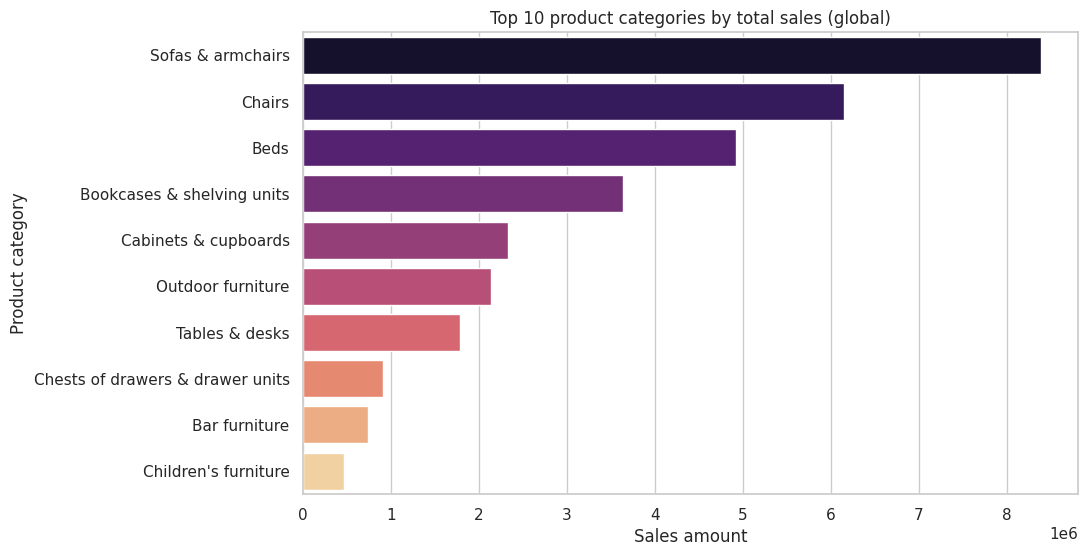

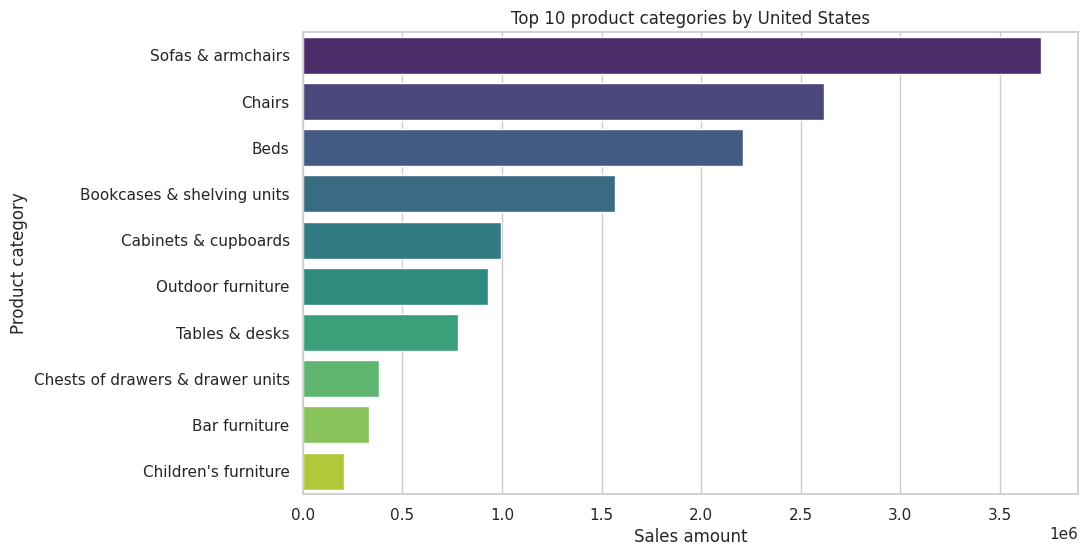

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_categories_total.values,
    y=top_categories_total.index,
    hue=top_categories_total.index,
    palette="magma"
)
plt.title("Top 10 product categories by total sales (global)")
plt.xlabel("Sales amount")
plt.ylabel("Product category")
plt.legend([],[], frameon=False)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_categories_top_country.values,
    y=top_categories_top_country.index,
    hue=top_categories_top_country.index,
    palette="viridis"
)
plt.title(f"Top 10 product categories by {top_country}")
plt.xlabel("Sales amount")
plt.ylabel("Product category")
plt.legend([],[], frameon=False)
plt.show()

The top products in the US **coincide completely with the global top**. The categories Sofas & armchairs, Chairs, and Beds generate the most revenue both in the US and worldwide. The categories Bar furniture and Children's furniture are not profitable at all, so it is worth considering removing these categories from the product range.

#Sales dynamics analysis

**Review the overall sales dynamics**

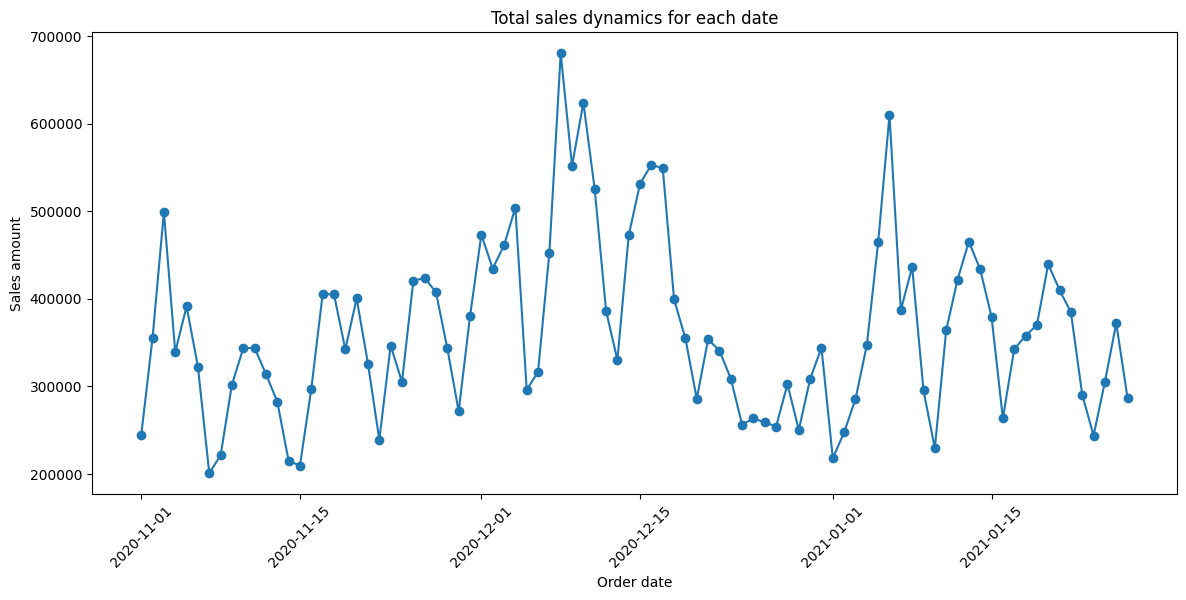

In [ ]:
daily_sales = sales.groupby('order_date')['price'].sum().reset_index()
daily_sales = daily_sales.sort_values('order_date')

plt.figure(figsize=(14,6))
plt.plot(daily_sales['order_date'], daily_sales['price'], marker='o')
plt.title("Total sales dynamics for each date")
plt.xlabel("Order date")
plt.ylabel("Sales amount")
plt.xticks(rotation=45)
plt.show()

We are seeing a decline in purchases before the New Year, but good profits before and after.
This is typical customer behavior—seasonality. Before the holidays, people usually actively buy gifts + there are vacation and logistics problems before major holidays.

**Sales analysis by traffic channel**

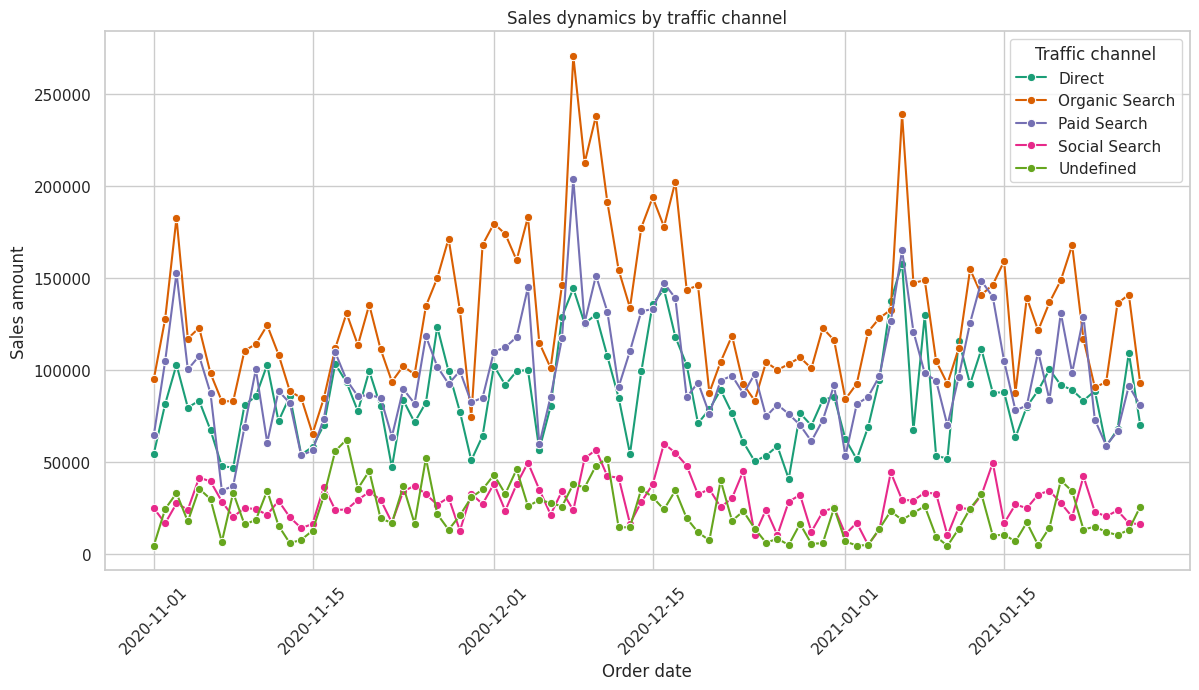

In [16]:
traffic_sales = (sales.groupby(['order_date', 'traffic_channel'])['price']
      .sum()
      .reset_index()
)

plt.figure(figsize=(14,7))

sns.lineplot(data=traffic_sales,
    x='order_date',
    y='price',
    hue='traffic_channel',
    marker='o',
    palette="Dark2"
)

plt.title("Sales dynamics by traffic channel")
plt.xlabel("Order date")
plt.ylabel("Sales amount")
plt.xticks(rotation=45)
plt.legend(title="Traffic channel")
plt.show()

We note that the channel brings us the most profit - "Organic Search", and the least - "Undefined".

#Traffic channel review by pivot table

Create a pivot table to examine the number of unique sessions by traffic source and device type.

In [ ]:
sales_without_na = sales.dropna(subset=['traffic_channel', 'device'])

traffic_and_device_for_session = pd.pivot_table(
    sales_without_na,
    index='traffic_channel',
    columns='device',
    values='session_id',
    aggfunc='nunique',
    fill_value=0
)

print(traffic_and_device_for_session)

device           desktop  mobile  tablet
traffic_channel                         
Direct              4655    2985     160
Organic Search      7011    4655     255
Paid Search         5261    3574     207
Social Search       1594    1065      57
Undefined           1181     834      44


Organic Search generates the most traffic — over 11,900 unique sessions. Social Search and Undefined have the lowest figures (2,700 and 2,000 sessions, respectively). Desktop leads in every channel. This means that most users access the site from computers (especially for Organic and Paid Search). Mobile is also a strong segment, but lags behind desktop.

#Statistical analysis of sales

In [18]:
daily_sales = sales.groupby("order_date")["price"].sum()

sales_mean = daily_sales.mean()
sales_median = daily_sales.median()
sales_mode = daily_sales.mode().iloc[0]
sales_std = daily_sales.std()
sales_min, sales_max = daily_sales.min(), daily_sales.max()
sales_range = sales_max - sales_min

print("Basic values of descriptive statistics")
print(f"Mean: {sales_mean}")
print(f"Median: {sales_median}")
print(f"Mode: {sales_mode}")
print(f"Minimum: {sales_min}, Maximum: {sales_max}, Range: {sales_range}")
print(f"Standard deviation: {sales_std}")

Basic values of descriptive statistics
Mean: 363315.1261363636
Median: 345354.0
Mode: 200892.2
Minimum: 200892.2, Maximum: 680509.5, Range: 479617.3
Standard deviation: 100327.3432442167


The mean is a bit higher than the median—the distribution is lightly skewed to the right.

The mode is way below the mean, so typical sales days are closer to 200–250 k.


The standard deviation of ≈ 100 k shows that the data is pretty variable, and sales aren't stable.

**Make a histogram to determine the distribution of data**

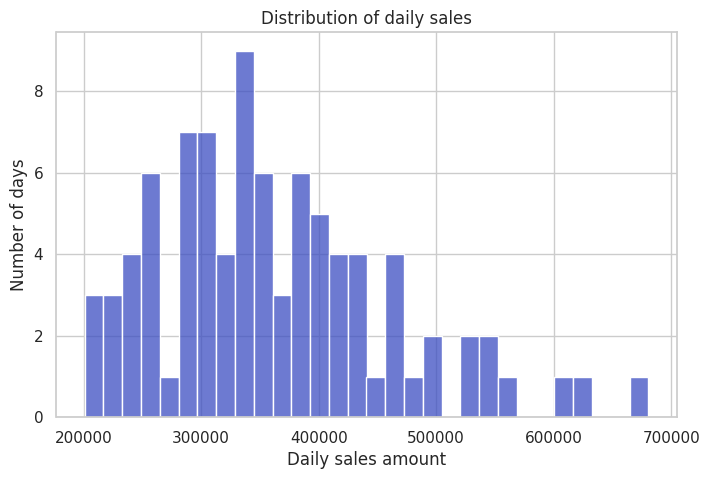

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(daily_sales, bins=30, color=plt.cm.coolwarm(1))
plt.title("Distribution of daily sales")
plt.xlabel("Daily sales amount")
plt.ylabel("Number of days")
plt.show()

The data has right-sided asymmetry, which means it's not normally distributed.

Sales are pretty stable most days (300–400k), but there are a few days with really high results.

The graph shows a few days with sales over 550–600k, which can be considered outliers(but I will calculate them manually).

**Detection of outliers using the IQR rule**

In [ ]:
Q1 = daily_sales.quantile(0.25)
Q3 = daily_sales.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = daily_sales[(daily_sales < lower_bound) | (daily_sales > upper_bound)]

print(f"\n Sales outliers:{outliers}")



 Sales outliers:order_date
2020-12-08    680509.5
2020-12-10    624104.6
Name: price, dtype: float64


These days significantly exceed both the average and the upper quartile.  Possible reasons for the outliers are the pre-holiday season (Christmas and New Year's shopping) or possible large-scale promotions or discounts before the holidays.

However, for a more qualitative analysis, it is important to clarify the reason for such outliers: whether it is seasonality or randomness.  

In [ ]:
outliers = ["2020-12-08", "2020-12-10"]
sales_clean = sales[~sales["order_date"].isin(outliers)]

I remove outliers so that they do not distort the overall results.

**D'Agostino-Pearson test**

I will use the D'Agostino-Pearson test to determine the normality of data distribution in order to further apply the appropriate methods for analysis.

In [ ]:
sales_for_DPtest = sales_clean["price"]

# Тест Д’Агостіно–Пірсона
_, p_value = normaltest(sales_for_DPtest)

print(f"P-value: {p_value}")

if p_value > 0.05:
    print("The data does not differ from the normal distribution (there is no reason to reject H0).")
else:
    print("The data deviates from the normal distribution (we reject H0).")

P-value: 0.0
The data deviates from the normal distribution (we reject H0).


#Statistical analysis of interrelationships

**Check the correlation between sales on the top three continents, analyze the statistical significance of the relationships using Spearman's correlation coefficient**

In [ ]:
sales_for_top3_continents = (sales.groupby(["order_date", "continent"])["price"].sum().unstack(fill_value=0))

#Choosing the top 3 continents
top3_continents = sales_for_top3_continents.sum().nlargest(3).index
sales_top3 = sales_for_top3_continents[top3]

for col1 in top3:
    for col2 in top3:
        if col1 < col2:
            stat, p = spearmanr(sales_top3[col1], sales_top3[col2])
            print(f"{col1} vs {col2}: correlation={stat:.3f}, p={p:.5f}")

Americas vs Asia: correlation=0.669, p=0.00000
Americas vs Europe: correlation=0.626, p=0.00000
Asia vs Europe: correlation=0.608, p=0.00000


Moderately positive correlation across all results

All results are statistically significant

Sales across continents are moving in sync

**Check the correlation between sales on the traffic channels, analyze the statistical significance of the relationships using Spearman's correlation coefficient**

In [ ]:
sales_for_tch = (sales.groupby(["order_date", "traffic_channel"])["price"].sum().unstack(fill_value=0))

# вибираємо топ-5 каналів
top5_channel = sales_for_tch.sum().nlargest(5).index
sales_top5 = sales_for_tch[top5_channel]

for i, col1 in enumerate(top5_channel):
    for col2 in top5_channel[i+1:]:
        stat, p = spearmanr(sales_top5[col1], sales_top5[col2])
        print(f"{col1} vs {col2}: correlation={stat:.3f}, p={p:.5f}")

Organic Search vs Paid Search: correlation=0.764, p=0.00000
Organic Search vs Direct: correlation=0.748, p=0.00000
Organic Search vs Social Search: correlation=0.385, p=0.00021
Organic Search vs Undefined: correlation=0.457, p=0.00001
Paid Search vs Direct: correlation=0.691, p=0.00000
Paid Search vs Social Search: correlation=0.420, p=0.00005
Paid Search vs Undefined: correlation=0.493, p=0.00000
Direct vs Social Search: correlation=0.394, p=0.00015
Direct vs Undefined: correlation=0.494, p=0.00000
Social Search vs Undefined: correlation=0.386, p=0.00020


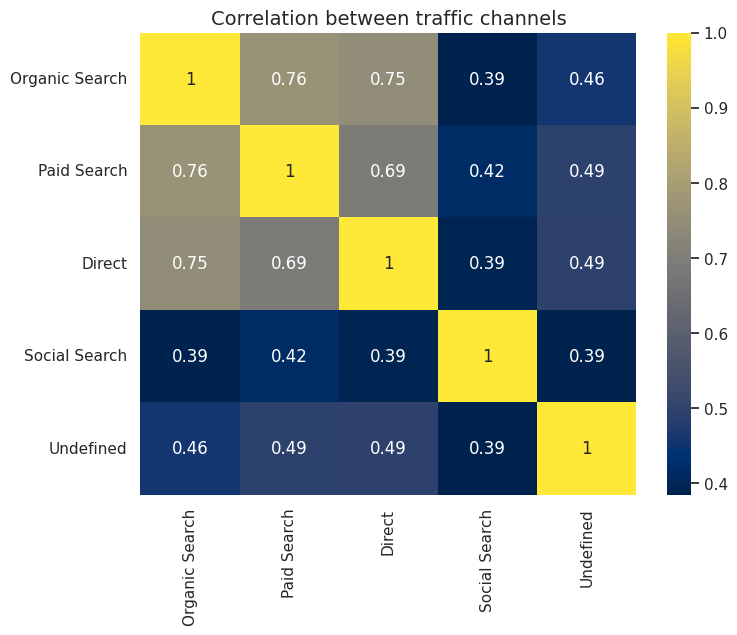

In [22]:
#I create a correlation matrix for easier graphing.
correlation_matrix = pd.DataFrame(
    {   "Organic Search": [1.000, 0.764, 0.748, 0.385, 0.457],
        "Paid Search":    [0.764, 1.000, 0.691, 0.420, 0.493],
        "Direct":         [0.748, 0.691, 1.000, 0.394, 0.494],
        "Social Search":  [0.385, 0.420, 0.394, 1.000, 0.386],
        "Undefined":      [0.457, 0.493, 0.494, 0.386, 1.000],
    },
    index=["Organic Search", "Paid Search", "Direct", "Social Search", "Undefined"]
)

#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="cividis")
plt.title("Сorrelation between traffic channels", fontsize=14)
plt.show()

All results are statistically significant

Strong correlations:
*   Organic Search vs Paid Search (r=0.764, p=0.00000)
*   Organic Search vs Direct (r=0.748, p=0.00000)
*   Paid Search vs Direct (r=0.691, p=0.00000)

Moderate correlations:
*   Organic Search vs Undefined (r=0.457, p=0.00001)
*   Paid Search vs Undefined (r=0.493, p=0.00000)
*   Direct vs Undefined (r=0.494, p=0.00000)

Weak correlations:
*   Organic Search vs Social Search (r=0.385, p=0.00021)
*   Paid Search vs Social Search (r=0.420, p=0.00005)
*   Direct vs Social Search (r=0.394, p=0.00015)
*   Social Search vs Undefined (r=0.386, p=0.00020)

#Statistical analysis of differences between groups.

**Analysis of session volume across different traffic channels to verify statistically significant differences between groups**

We have the number of sessions, so we have the numbers and comparisons of traffic channel groups. For this kind of analysis, we use ANOVA.

In [ ]:
unique_channels = sales["traffic_channel"].unique()
session_by_channel = [sales[sales["traffic_channel"] == ch]["session_id"].values for ch in unique_channels]

f_stat, p_value = f_oneway(*session_by_channel)

print(f"\nF-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Інтерпретація
if p_value < 0.05:
    print("There are statistically significant differences between traffic channels.")
else:
    print("There are no statistically significant differences between traffic channels.")




F-statistic: 1.7525
P-value: 0.1354
There are no statistically significant differences between traffic channels.


The average number of sessions is the same for all channels—the channels bring in roughly the same number of sessions.

#Tableau Dashboard

https://public.tableau.com/app/profile/julia.vasilenko/viz/Book1_17550700690070/Salesandcustomerbehavioranalytics?publish=yes

#Summary

An analysis was conducted based on a dataset containing information about *online store sales*, customers and their registration, and products.


---


Preliminary exploratory data analysis revealed the following facts about the dataset:
- The period under review is from **January 27, 2021, to November 1, 2020**.
- The mean is slightly above the median — the distribution is **slightly skewed to the right**.
- The mode is significantly lower than the mean, so typical sales days are closer to **200–250 thousand**.
- The standard deviation of ≈ 100 thousand shows that **the data is quite variable** and sales are unstable.



---



**Seasonality:**

Sales peak clearly before the winter holidays, but demand falls on the holidays themselves.


---


**Outliers:**

Two days (December 8, 2020, and December 10, 2020) showed abnormally high sales. This may be the result of large-scale marketing campaigns, promotions, or the launch of a popular product.


---


**Top products:**

A limited number of categories generate the most profit. It is worth focusing on optimizing the product range and promoting the top 5 categories.


---


**Regions:**

Sales are concentrated in a few countries (USA, India, Canada), which may indicate potential for expansion into less covered markets.


---


**Traffic:**

Most users come through Organic Search and Paid Search, with Direct also showing strong results. This indicates that SEO and advertising are working, but it is important to maintain loyalty.


---


**Devices:**

Most sessions occur on mobile devices, but desktop also has a significant share. You need to make sure that the site is sufficiently adapted to these devices.


---


**Accounts:**

Only a small proportion of sessions are associated with authorized accounts. This is an area for growth — encouraging users to register will increase the possibility of repeat sales.


---


**Correlations and statistics**



*   Sales between continents correlate strongly (ρ ≈ 0.61–0.67), which may mean that global factors such as seasonality or marketing campaigns affect different continents simultaneously.

*   The Organic Search, Paid Search, and Direct traffic channels have a very high correlation (ρ ≈ 0.76), but Social Search has a weaker correlation with other channels (ρ ≈ 0.38–0.42), so it is worth conducting additional research on this channel.


*   Using the D'Agostino-Pearson test, it was determined that the distribution of sales is not normal, which should be taken into account when choosing statistical tests.




